In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls

drive  sample_data


In [3]:
%cd /content/drive/MyDrive
!ls

/content/drive/MyDrive
'015442『審查資料預覽檔』 (1) (1).gdoc'
'015442『審查資料預覽檔』 (1) (1).pdf'
 0226程式設計.drawio
 0324雲端計算.gdoc
'0930 notebooklm.gdoc'
 1013_python筆記.gdoc
 1020筆記.gdoc
 1020筆記.gslides
'112級新鮮人成長營專題簡報_第8組pptx 的副本.pdf'
 19_林佳諄.docx
 20220115142659.png
 20220728191311.png
 20220728191341.png
 20220728191430.png
 20220728191513.png
 20220728191550.png
 20220728191557.png
 20220728191609.png
 20220728191619.png
 20220728191626.png
 9e44e672c5c0980e.png
'Adobe Photoshop 2022.zip'
 AI專題報告架構.gdoc
 Classroom
 CNN_notebooklm.gdoc
'Colab Notebooks'
'D1245692 9 16深度學習  林佳諄.gdoc'
'D1245692 Digital Twins作業.gdoc'
 D1245692.docx
 D1245692_分類分析.gdoc
'D1245692_大數據分析：商業應用與策略管理 .gdoc'
'D1245692 林佳諄 0315數學實習.docx'
 D1245692_林佳諄_0430.gdoc
'D1245692 林佳諄 0507.gdoc'
'D1245692 林佳諄 0514.gdoc'
'D1245692 林佳諄 0519.gdoc'
'D1245692 林佳諄 0519雲端計算資安事件.gdoc'
'D1245692 林佳諄 0520.gdoc'
'D1245692 林佳諄 0526.gdoc'
'D1245692 林佳諄 0528.gdoc'
'D1245692 林佳諄 0916作業.gdoc'
'D1245692 林佳諄 0923 notebooklm生成筆記.gdoc'
'D1245692 林佳諄 9 9 C

In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models, optimizers
import matplotlib.pyplot as plt

# === 1. 設定基本參數 ===
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

train_dir = "/content/drive/MyDrive/data/train"
val_dir = "/content/drive/MyDrive/data/validation"

In [10]:
# === 2. 資料前處理 ===
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'  # 貓狗是二分類
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary'
)



Found 60 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [11]:
# === 3. 載入 VGG16 預訓練模型 ===
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# 凍結卷積層（只訓練後面自定義的分類層）
base_model.trainable = False




58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [12]:
# === 4. 建立完整模型 ===
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # sigmoid 用於二分類
])



In [13]:
# === 5. 編譯模型 ===
model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
)



In [14]:
# === 6. 模型訓練 ===
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen
)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 73s 57s/step - accuracy: 0.4243 - loss: 1.0627 - val_accuracy: 0.5333 - val_loss: 0.7676
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 884ms/step - accuracy: 0.6410 - loss: 0.6962 - val_accuracy: 0.5000 - val_loss: 0.8970
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 870ms/step - accuracy: 0.5542 - loss: 0.8827 - val_accuracy: 0.6667 - val_loss: 0.6039
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 951ms/step - accuracy: 0.6484 - loss: 0.6836 - val_accuracy: 0.6333 - val_loss: 0.6580
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.7397 - loss: 0.5488 - val_accuracy: 0.7167 - val_loss: 0.5577
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.7611 - loss: 0.4502 - val_accuracy: 0.6167 - val_loss: 0.6178
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 961ms/step - accuracy: 0.7738 - loss: 0.4935 - val_accuracy: 0.6833 - val_loss: 0.5844
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 949ms/step - accuracy: 0.8183 - loss: 0.3855 - val_accuracy: 0.7500 - val_loss: 0.5045

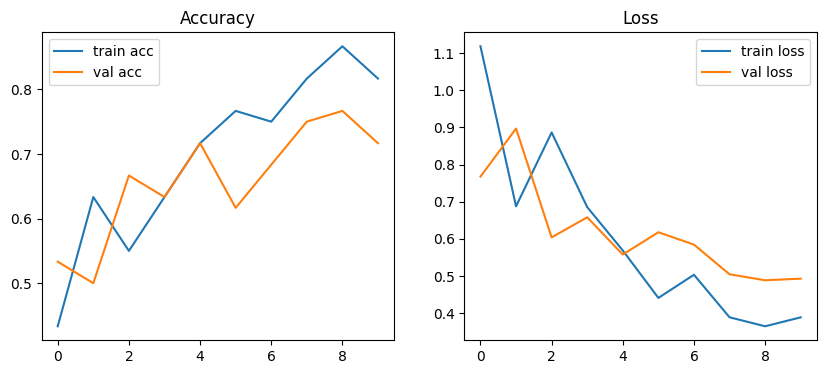

In [15]:
# === 7. 繪製訓練曲線 ===
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title("Loss")

plt.show()

# === 8. 儲存模型 ===
model.save("vgg16_cats_dogs.h5")